In [13]:
from sklearn import tree
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

In [14]:
df_bp = pd.read_csv("BPTrunc2_train.csv")
df_bp.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,6319,Female,79.0,0,0,Yes,Private,Urban,97.93,31.2,NaN,0
1,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,68249,Female,27.0,0,0,Yes,Private,Rural,85.60,21.4,NaN,0
3,55232,Female,38.0,0,0,Yes,Private,Rural,79.83,27.9,smokes,0
4,29865,Female,21.0,0,0,No,Private,Rural,89.44,21.9,smokes,0


In [15]:
df_bp['gender'].replace('Male',1, inplace=True)
df_bp['gender'].replace('Female',0, inplace=True)
df_bp['gender'].replace('Other',0,inplace=True)

df_bp['ever_married'].replace('Yes',1, inplace=True)
df_bp['ever_married'].replace('No',0, inplace=True)

df_bp['Residence_type'].replace('Urban',1, inplace=True)
df_bp['Residence_type'].replace('Rural',0, inplace=True)

df_bp['smoking_status'].replace('smokes',1, inplace=True)
df_bp['smoking_status'].replace('never smoked',0, inplace=True)
df_bp['smoking_status'].replace('formerly smoked',1, inplace=True)

In [16]:
BPdata = df_bp.drop(["id","work_type", "bmi"], axis=1)
feature_names = BPdata.columns
BPdata.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,smoking_status,stroke
0,0,79.0,0,0,1,1,97.93,NaN,0
1,1,67.0,0,1,1,1,228.69,1.0,1
2,0,27.0,0,0,1,0,85.60,NaN,0
3,0,38.0,0,0,1,0,79.83,1.0,0
4,0,21.0,0,0,0,0,89.44,1.0,0


In [18]:
BPdata =BPdata[BPdata.replace([np.inf, -np.inf], np.nan).notnull().all(axis=1)]
BPdata=BPdata.fillna(0.0)

In [19]:
# No non-zeros in each column
BPdata.astype(bool).sum(axis=0)

gender               141
age                  312
hypertension          53
heart_disease         26
ever_married         246
Residence_type       162
avg_glucose_level    312
smoking_status       143
stroke                62
dtype: int64

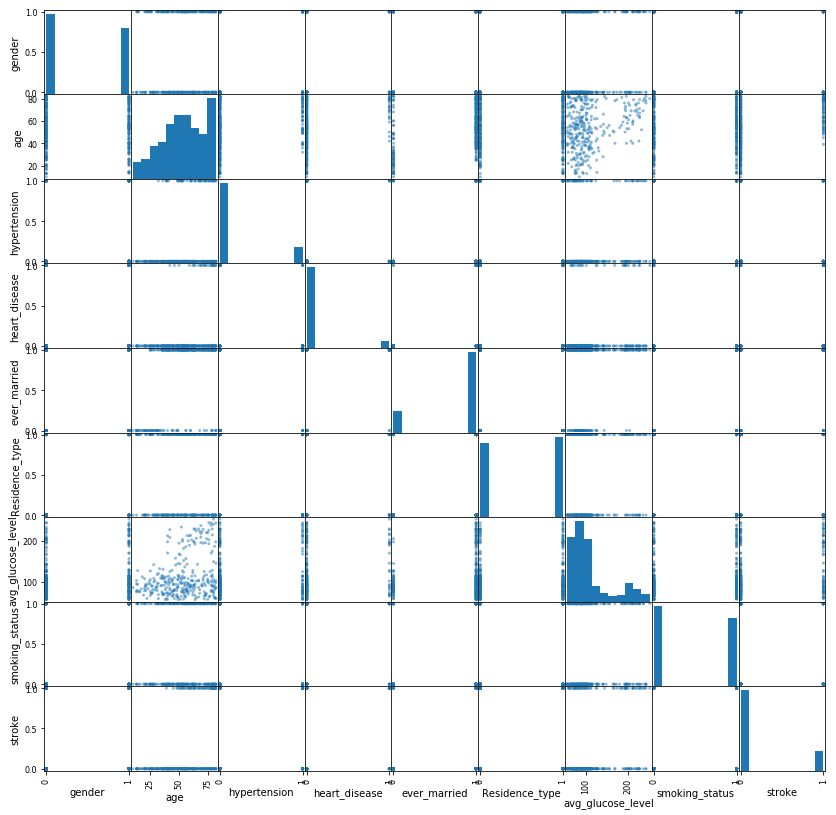

In [20]:
from pandas.plotting import scatter_matrix
# scatter plot matrix
plt.rcParams["figure.figsize"] = (14,14)
scatter_matrix(BPdata)
plt.show()

In [21]:
X = BPdata.iloc[:, 0:8].values  
y = BPdata.iloc[:, 8].values  

In [22]:
import scipy
import sklearn
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
validation_size = 0.20
seed=7
X_train, X_validation, y_train, y_validation = model_selection.train_test_split(X, y,test_size=validation_size, random_state=seed)
scoring = 'accuracy'

results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.799333 (0.064114)
LDA: 0.815667 (0.066900)
KNN: 0.799500 (0.071009)
CART: 0.739167 (0.050460)
NB: 0.787000 (0.060008)
SVM: 0.799667 (0.079505)


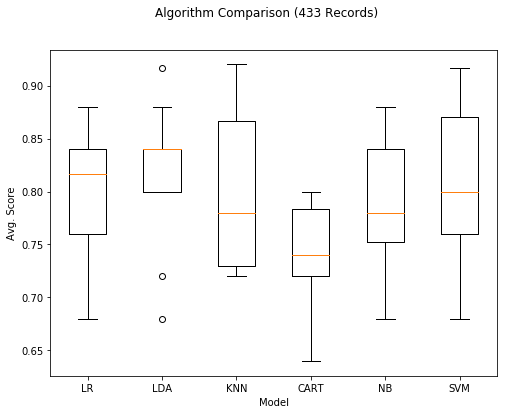

In [23]:
# Compare Algorithms
plt.rcParams["figure.figsize"] = (8,6)
fig = plt.figure()
fig.suptitle('Algorithm Comparison (433 Records)')
ax = fig.add_subplot(111)
plt.boxplot(results)
plt.ylabel('Avg. Score')
plt.xlabel('Model')
ax.set_xticklabels(names)
# plt.grid()
plt.show()
# fig.savefig('stroke433records.jpg')

In [24]:
import scipy
import sklearn
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
validation_size = 0.30
seed=7
X_train, X_validation, y_train, y_validation = model_selection.train_test_split(X, y,test_size=validation_size, random_state=seed)
scoring = 'accuracy'

results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.794372 (0.078228)
LDA: 0.826407 (0.065758)
KNN: 0.821861 (0.070697)
CART: 0.761688 (0.096555)
NB: 0.802597 (0.050603)
SVM: 0.803680 (0.090039)


In [25]:
import scipy
import sklearn
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
validation_size = 0.10
seed=7
X_train, X_validation, y_train, y_validation = model_selection.train_test_split(X, y,test_size=validation_size, random_state=seed)
scoring = 'accuracy'

results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.800000 (0.075255)
LDA: 0.817857 (0.066720)
KNN: 0.792857 (0.087190)
CART: 0.739286 (0.067857)
NB: 0.807143 (0.071785)
SVM: 0.803571 (0.073627)


In [ ]:
# Make predictions using Gaussian on validation dataset
lr = LogisticRegression()
lr.fit(X_train, y_train)
predictions = lr.predict(X_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))